### Exploratory Data Analysis (EDA) and Business Insights

In [1]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/_p/hvtx5vg5193b0yzmp76klg9m0000gn/T/ipykernel_72474/4088088026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_distribution.index, y=customer_distribution.values, palette='viridis')


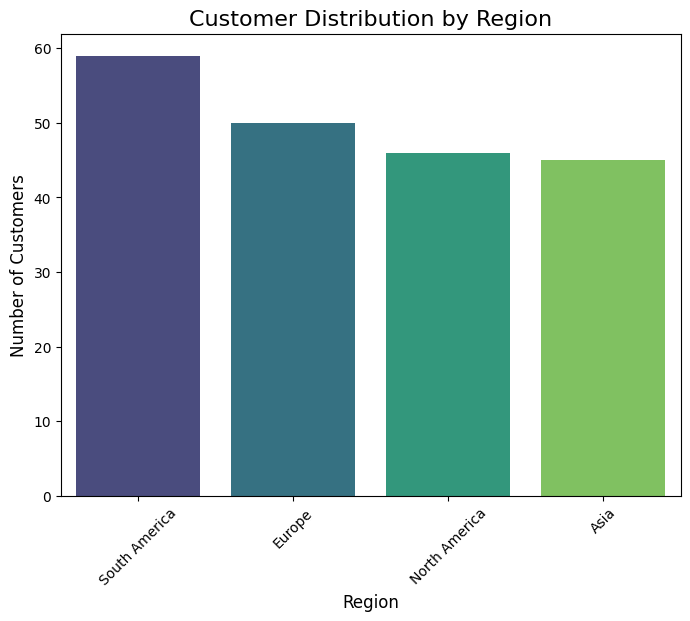

In [3]:
# Count customers by region
customer_distribution = customers['Region'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_distribution.index, y=customer_distribution.values, palette='viridis')
plt.title('Customer Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()


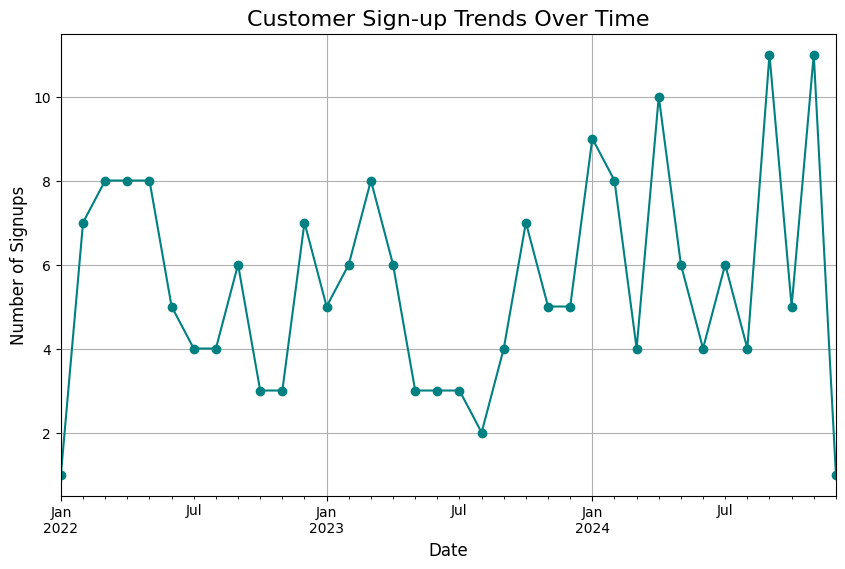

In [4]:
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Group by signup year and month
signup_trends = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()

# Plot
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='o', color='teal')
plt.title('Customer Sign-up Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid()
plt.show()


/var/folders/_p/hvtx5vg5193b0yzmp76klg9m0000gn/T/ipykernel_72474/2987743779.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_value_customers.index, y=high_value_customers.values, palette='coolwarm')


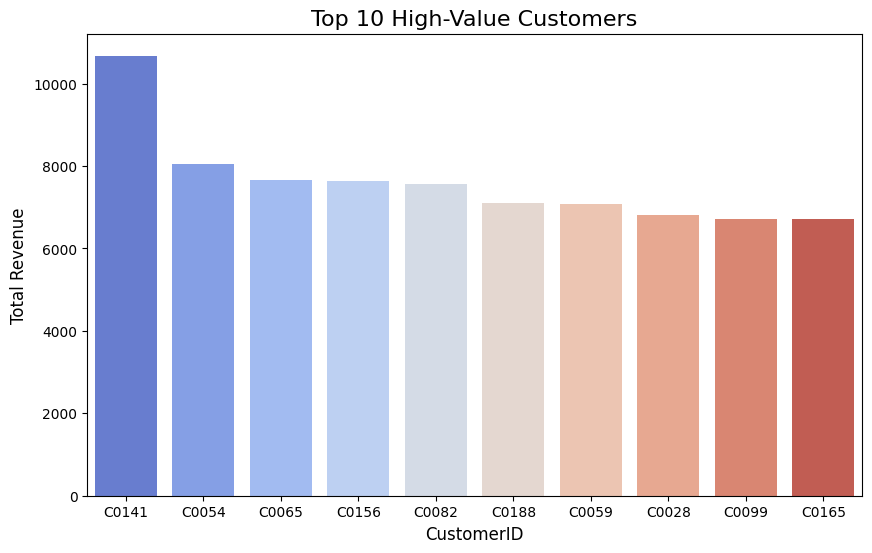

In [5]:
# Merge transactions with customers
merged_data = transactions.merge(customers, on='CustomerID')

# Calculate total revenue per customer
high_value_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=high_value_customers.index, y=high_value_customers.values, palette='coolwarm')
plt.title('Top 10 High-Value Customers', fontsize=16)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.show()


/var/folders/_p/hvtx5vg5193b0yzmp76klg9m0000gn/T/ipykernel_72474/501823418.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=best_selling_products['ProductName'], x=best_selling_products['Quantity'], palette='plasma')


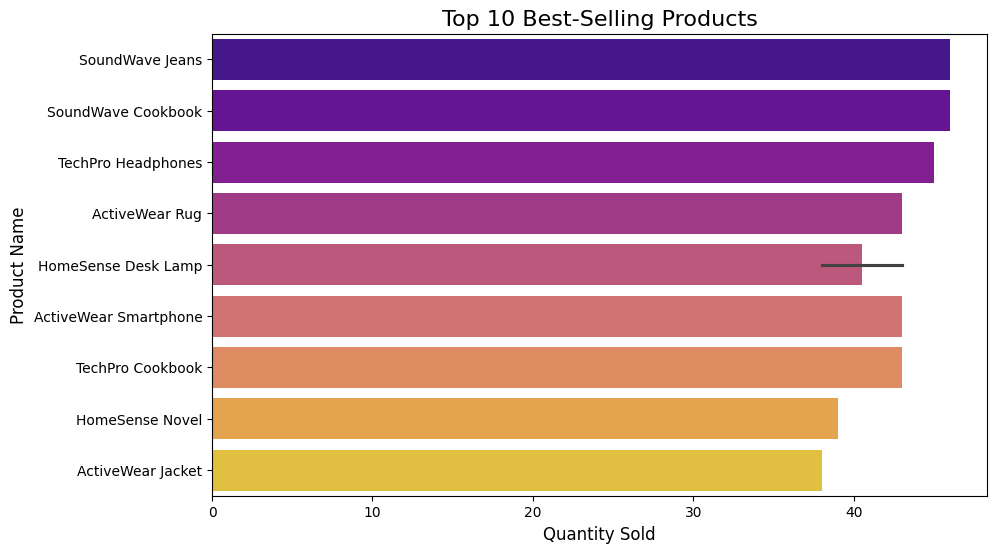

In [6]:
# Group by ProductID and calculate total quantity sold
best_selling_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)

# Add product names
best_selling_products = best_selling_products.reset_index().merge(products[['ProductID', 'ProductName']], on='ProductID')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=best_selling_products['ProductName'], x=best_selling_products['Quantity'], palette='plasma')
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

/var/folders/_p/hvtx5vg5193b0yzmp76klg9m0000gn/T/ipykernel_72474/2796141906.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_trends.values, y=category_trends.index, palette='magma')


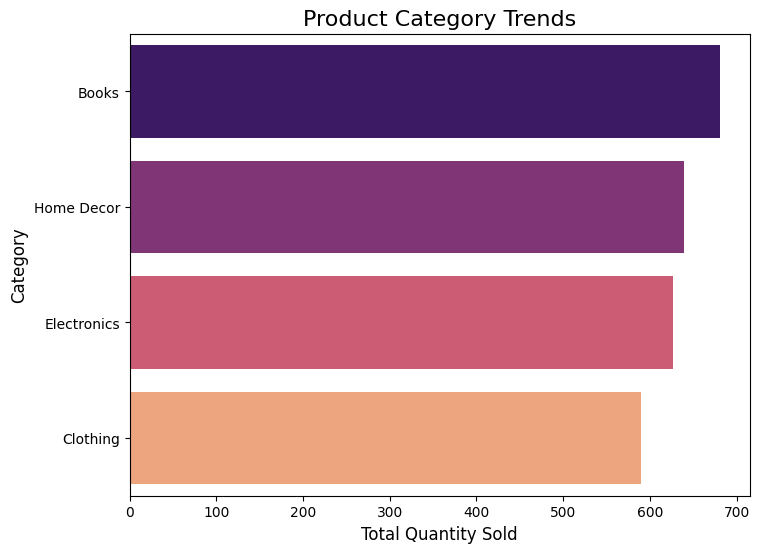

In [7]:
# Merge transactions with products
category_data = transactions.merge(products, on='ProductID')

# Calculate total quantity sold per category
category_trends = category_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=category_trends.values, y=category_trends.index, palette='magma')
plt.title('Product Category Trends', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

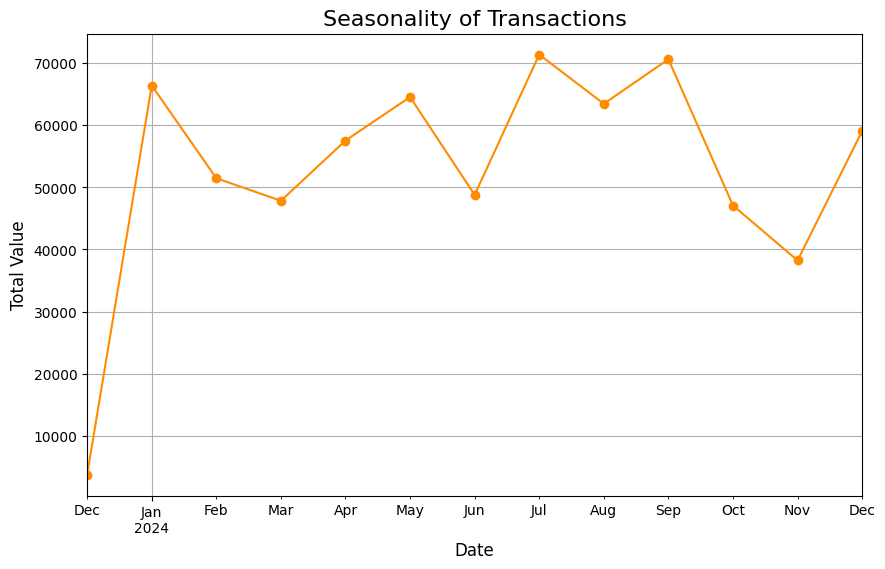

In [8]:
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Group by month
seasonality = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot
plt.figure(figsize=(10, 6))
seasonality.plot(kind='line', marker='o', color='darkorange')
plt.title('Seasonality of Transactions', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.grid()
plt.show()

Average Transaction Value: $690.00


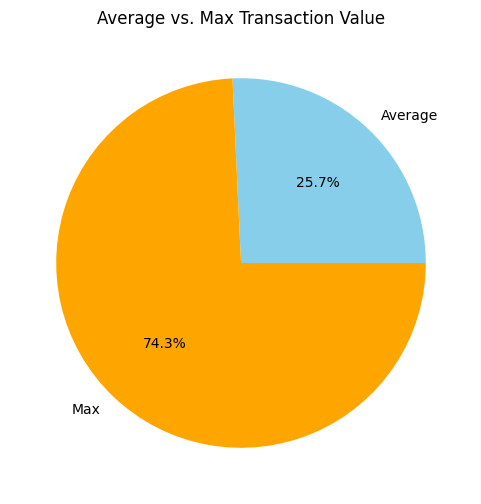

In [9]:
# Calculate average value per transaction
average_transaction_value = transactions['TotalValue'].mean()

# Print and visualize
print(f"Average Transaction Value: ${average_transaction_value:.2f}")

# Visualization
plt.figure(figsize=(6, 6))
plt.pie([average_transaction_value, transactions['TotalValue'].max()], labels=['Average', 'Max'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Average vs. Max Transaction Value')
plt.show()

In [10]:
print(type(transactions))
print(type(products))
print(type(customers))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [11]:

# Confirm they are DataFrames
print(type(customers))      
print(type(products))       
print(type(transactions)) 


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [12]:
print(customers.columns)
print(products.columns)
print(transactions.columns)

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [13]:
# Merge transactions with products and customers
category_data = transactions.merge(products, on='ProductID', how='inner').merge(customers, on='CustomerID', how='inner')

# Verify the merged DataFrame
print(category_data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region SignupDate  
0   Andrea Jenkins         Europe 2022-12-03 

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName', 'Category',
       'Price_y', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')


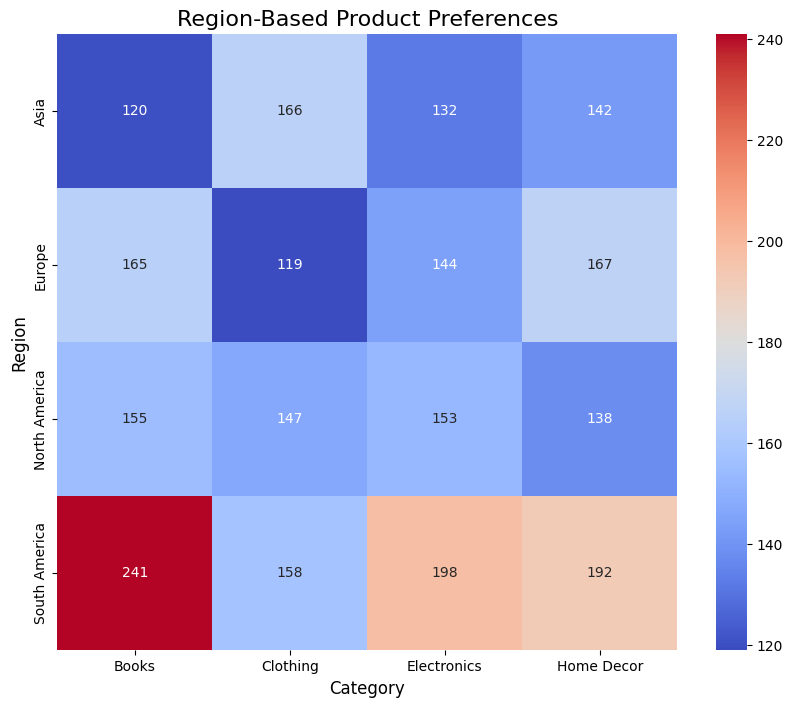

In [14]:
# Merge transactions with products and customers
category_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Verify available columns
print(category_data.columns)

# Calculate preferences based on Region and Category
if 'Region' in category_data.columns:
    region_preferences = category_data.groupby(['Region', 'Category'])['Quantity'].sum().unstack()

    # Plot Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(region_preferences, annot=True, cmap='coolwarm', fmt='.0f')
    plt.title('Region-Based Product Preferences', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Region', fontsize=12)
    plt.show()
else:
    print("The 'Region' column is missing. Check the data structure.")
